### Install Library

In [328]:
# !pip3 install xgboost

### Set Up Coding Environment

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

### Load Dataset

In [330]:
df = pd.read_csv('Airbnb_dataset_cleaned1.csv')
df

log_price property_type        room_type  accommodates  bathrooms  \
0       5.129899     Apartment  Entire home/apt             7        1.0   
1       4.976734     Apartment  Entire home/apt             5        1.0   
2       4.744932     Apartment  Entire home/apt             2        1.0   
3       4.442651     Apartment     Private room             2        1.0   
4       4.418841     Apartment  Entire home/apt             3        1.0   
...          ...           ...              ...           ...        ...   
31871   3.912023     Apartment     Private room             1        1.0   
31872   5.214936         House  Entire home/apt             6        2.0   
31873   4.276666     Apartment     Private room             2        1.0   
31874   5.068904     Apartment  Entire home/apt             5        1.0   
31875   4.234107     Apartment     Private room             2        1.0   

       bed_type cancellation_policy  cleaning_fee city host_has_profile_pic  \
0      Real Bed              strict          True  NYC                    t   
1      Real Bed            moderate          True  NYC                    t   
2      Real Bed            moderate          True   DC                    t   
3      Real Bed              strict          True   SF                    t   
4      Real Bed            moderate          True   LA                    t   
...         ...                 ...           ...  ...                  ...   
31871  Real Bed            flexible         False  NYC                    t   
31872  Real Bed              strict          True   LA                    t   
31873  Real Bed            flexible          True   LA                    t   
31874  Real Bed              strict          True  NYC                    t   
31875  Real Bed              strict          True  NYC                    t   

      host_identity_verified host_response_rate instant_bookable   latitude  \
0                          f               100%                t  40.766115   
1                          t               100%                t  40.808110   
2                          t               100%                t  38.925627   
3                          t               100%                t  37.753164   
4                          f               100%                t  33.980454   
...                      ...                ...              ...        ...   
31871                      t               100%                f  40.826209   
31872                      f               100%                f  34.036418   
31873                      t               100%                t  34.062627   
31874                      t                93%                t  40.726027   
31875                      t               100%                f  40.670487   

        longitude  number_of_reviews  review_scores_rating  zipcode  bedrooms  \
0      -73.989040                  6                  93.0    10019       3.0   
1      -73.943756                 10                  92.0    10027       1.0   
2      -77.034596                  4                  40.0    20009       0.0   
3     -122.429526                  3                 100.0    94131       1.0   
4     -118.462821                 15                  97.0    90292       1.0   
...           ...                ...                   ...      ...       ...   
31871  -73.951042                 28                  98.0    10031       1.0   
31872 -118.360197                 16                  96.0    90016       3.0   
31873 -118.345824                  2                  90.0    90036       1.0   
31874  -73.987512                150                  82.0  10003.0       2.0   
31875  -73.941769                 19                  96.0  11213.0       2.0   

       beds  
0       3.0  
1       3.0  
2       1.0  
3       1.0  
4       1.0  
...     ...  
31871   1.0  
31872   3.0  
31873   1.0  
31874   3.0  
31875   1.0  

[31876 rows x 20 columns]

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               31876 non-null  float64
 1   property_type           31876 non-null  object 
 2   room_type               31876 non-null  object 
 3   accommodates            31876 non-null  int64  
 4   bathrooms               31876 non-null  float64
 5   bed_type                31876 non-null  object 
 6   cancellation_policy     31876 non-null  object 
 7   cleaning_fee            31876 non-null  bool   
 8   city                    31876 non-null  object 
 9   host_has_profile_pic    31876 non-null  object 
 10  host_identity_verified  31876 non-null  object 
 11  host_response_rate      31876 non-null  object 
 12  instant_bookable        31876 non-null  object 
 13  latitude                31876 non-null  float64
 14  longitude               31876 non-null

### Check Missing Values and Remove unnecessary features 

In [332]:
# check if there are null values in the dataset
print(df.isna().sum())
# sum up the number of null values of the data
print("Total Null/NA values:",df.isnull().values.sum())
# Drop rows with any missing values
# df.dropna(inplace=True)

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64
Total Null/NA values: 0


### Identify the type of Columns

In [333]:
# Identify Categorical Columns
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
# Display the Categorical variables
categorical_info = pd.DataFrame({'Categorical Variable': categorical_vars})
categorical_info

Categorical Variable
0           property_type
1               room_type
2                bed_type
3     cancellation_policy
4                    city
5    host_has_profile_pic
6  host_identity_verified
7      host_response_rate
8        instant_bookable
9                 zipcode

In [334]:
# Identify Numerical Columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
# Display the numerical variables
numerical_info = pd.DataFrame({'Numerical Variable': numerical_vars})
numerical_info

Numerical Variable
0             log_price
1          accommodates
2             bathrooms
3              latitude
4             longitude
5     number_of_reviews
6  review_scores_rating
7              bedrooms
8                  beds

### Encoding our categorical variables, which may include string labels, into numerical representations

In [335]:
# Replace "%" with an empty string in the specified column
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

In [336]:
# Create a dictionary to map city names to numerical values
city_mapping = {'NYC': 0, 'SF': 1, 'LA': 2, 'Boston': 3,  'Chicago': 4,  'DC': 5}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df['city'] = df['city'].replace(city_mapping)

# Display the updated DataFrame
print(df['city'].unique())

[0 5 1 2 3 4]


In [337]:
# Create a dictionary to map city names to numerical values
city_mapping = {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df['room_type'] = df['room_type'].replace(city_mapping)

# Display the updated DataFrame
print(df['room_type'].unique())

[0 1 2]


In [338]:
label_encoder = LabelEncoder()
df['host_has_profile_pic'] = label_encoder.fit_transform(df['cleaning_fee']) # Yes: 1; No: 0
df['host_has_profile_pic'].unique()

array([1, 0])

In [339]:
# Create a dictionary to map city names to numerical values
cancellation_mapping = {'strict': 0, 'moderate': 1, 'flexible': 2, 'super_strict_30': 3,  'super_strict_60': 4}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df['cancellation_policy'] = df['cancellation_policy'].replace(cancellation_mapping)

# Display the updated DataFrame
print(df['cancellation_policy'].unique())

[0 1 2 3 4]


In [340]:
label_encoder = LabelEncoder()
df['instant_bookable'] = label_encoder.fit_transform(df['instant_bookable']) # Yes: 1; No: 0
df['instant_bookable'].unique()

df['cleaning_fee'] = label_encoder.fit_transform(df['cleaning_fee']) # Yes: 1; No: 0
df['cleaning_fee'].unique()

df['host_identity_verified'] = label_encoder.fit_transform(df['host_identity_verified']) # Yes: 1; No: 0
df['host_identity_verified'].unique()
df['host_identity_verified'].unique()

array([0, 1])

In [341]:
df['bed_type'].unique()
# Define the mapping dictionary for 'bed_type'
bed_type_mapping = {'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Airbed': 3, 'Couch': 4}

# Map the values using the defined dictionary and replace the rest with 5
df['bed_type'] = df['bed_type'].replace(bed_type_mapping)

# Display the updated DataFrame
print(df['bed_type'].unique())

[0 1 2 4 3]


In [342]:
# Define the mapping dictionary
property_type_mapping = {'Apartment': 0, 'House': 1, 'Townhouse': 2, 'Hostel': 3}

# Define a custom function to apply the mapping
def map_property_type(property_type):
    return property_type_mapping.get(property_type, 4)

# Apply the custom function to the 'property_type' column
df['property_type'] = df['property_type'].apply(map_property_type)

# Display the updated DataFrame
print(df['property_type'].unique())

[0 4 1 2 3]


In [343]:
# Convert the object column to numeric
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Convert the object column to numeric
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

### Exploratory Data Analysis (EDA)

In [344]:
df.describe().T

count          mean           std          min  \
log_price               31876.0      4.751857      0.677479     0.000000   
property_type           31876.0      0.695508      1.203949     0.000000   
room_type               31876.0      0.452723      0.547930     0.000000   
accommodates            31876.0      3.329935      2.255250     1.000000   
bathrooms               31876.0      1.241843      0.587227     0.000000   
bed_type                31876.0      0.054273      0.362653     0.000000   
cancellation_policy     31876.0      0.679916      0.782538     0.000000   
cleaning_fee            31876.0      0.821308      0.383101     0.000000   
city                    31876.0      1.502792      1.554074     0.000000   
host_has_profile_pic    31876.0      0.821308      0.383101     0.000000   
host_identity_verified  31876.0      0.730205      0.443860     0.000000   
host_response_rate      31876.0     95.525850     13.411131     0.000000   
instant_bookable        31876.0      0.292038      0.454707     0.000000   
latitude                31876.0     38.344365      3.152772    33.338905   
longitude               31876.0    -93.349610     21.733626  -122.511500   
number_of_reviews       31876.0     31.044077     43.847461     1.000000   
review_scores_rating    31876.0     94.218283      7.255328    20.000000   
zipcode                 31864.0  46939.295098  38728.664248  2108.000000   
bedrooms                31876.0      1.284383      0.866330     0.000000   
beds                    31876.0      1.797779      1.331471     0.000000   

                                 25%           50%           75%           max  
log_price                   4.304065      4.700480      5.176150      7.575585  
property_type               0.000000      0.000000      1.000000      4.000000  
room_type                   0.000000      0.000000      1.000000      2.000000  
accommodates                2.000000      2.000000      4.000000     16.000000  
bathrooms                   1.000000      1.000000      1.000000      8.000000  
bed_type                    0.000000      0.000000      0.000000      4.000000  
cancellation_policy         0.000000      0.000000      1.000000      4.000000  
cleaning_fee                1.000000      1.000000      1.000000      1.000000  
city                        0.000000      2.000000      2.000000      5.000000  
host_has_profile_pic        1.000000      1.000000      1.000000      1.000000  
host_identity_verified      0.000000      1.000000      1.000000      1.000000  
host_response_rate        100.000000    100.000000    100.000000    100.000000  
instant_bookable            0.000000      0.000000      1.000000      1.000000  
latitude                   34.106019     40.647441     40.750007     42.390437  
longitude                -118.346663    -77.027374    -73.954669    -71.000462  
number_of_reviews           5.000000     14.000000     39.000000    605.000000  
review_scores_rating       92.000000     96.000000     99.000000    100.000000  
zipcode                 11103.000000  20009.000000  90068.000000  94158.000000  
bedrooms                    1.000000      1.000000      2.000000     10.000000  
beds                        1.000000      1.000000      2.000000     16.000000

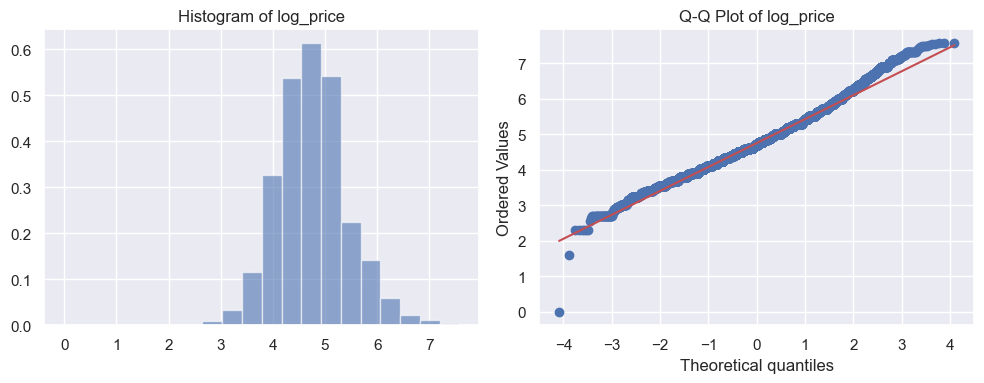

In [345]:
# Check log_price if it is normality or not
# Plot histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df["log_price"], bins=20, density=True, alpha=0.6)
plt.title("Histogram of log_price")
   
# Plot Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df["log_price"], dist="norm", plot=plt)
plt.title("Q-Q Plot of log_price")
   
plt.tight_layout()
plt.show()

In [346]:
df.corr() # print out correlation between the features

log_price  property_type  room_type  accommodates  \
log_price                1.000000       0.027445  -0.650649      0.596740   
property_type            0.027445       1.000000   0.036197      0.065471   
room_type               -0.650649       0.036197   1.000000     -0.456180   
accommodates             0.596740       0.065471  -0.456180      1.000000   
bathrooms                0.349508       0.122755  -0.092096      0.496750   
bed_type                -0.103240      -0.002172   0.149797     -0.070418   
cancellation_policy     -0.180417       0.020321   0.160905     -0.190418   
cleaning_fee             0.171830      -0.006896  -0.220341      0.160907   
city                    -0.002053       0.147288  -0.092320      0.115866   
host_has_profile_pic     0.171830      -0.006896  -0.220341      0.160907   
host_identity_verified   0.049795      -0.007141  -0.051545      0.043703   
host_response_rate       0.001033       0.044594  -0.021259      0.043299   
instant_bookable        -0.049303       0.009600   0.025889      0.047469   
latitude                -0.001134      -0.188807   0.048403     -0.068036   
longitude               -0.044994      -0.209181   0.052631     -0.067208   
number_of_reviews       -0.009738       0.007313  -0.014317      0.005958   
review_scores_rating     0.079769       0.048981  -0.034668     -0.037230   
zipcode                  0.026344       0.213707  -0.053475      0.077859   
bedrooms                 0.504826       0.055532  -0.245193      0.722644   
beds                     0.466525       0.071380  -0.319669      0.820513   

                        bathrooms  bed_type  cancellation_policy  \
log_price                0.349508 -0.103240            -0.180417   
property_type            0.122755 -0.002172             0.020321   
room_type               -0.092096  0.149797             0.160905   
accommodates             0.496750 -0.070418            -0.190418   
bathrooms                1.000000 -0.038212            -0.085883   
bed_type                -0.038212  1.000000             0.033468   
cancellation_policy     -0.085883  0.033468             1.000000   
cleaning_fee             0.052649 -0.023679            -0.229305   
city                     0.117260  0.002514             0.063564   
host_has_profile_pic     0.052649 -0.023679            -0.229305   
host_identity_verified   0.018759 -0.002193            -0.090027   
host_response_rate       0.016372 -0.010880            -0.065380   
instant_bookable         0.001666 -0.028771            -0.010874   
latitude                -0.126440  0.004118            -0.008182   
longitude               -0.123421  0.002887            -0.003940   
number_of_reviews       -0.053090 -0.007517            -0.106994   
review_scores_rating     0.000274  0.000410             0.053534   
zipcode                  0.127918 -0.001205             0.012574   
bedrooms                 0.572261 -0.060411            -0.133158   
beds                     0.509581 -0.067971            -0.171575   

                        cleaning_fee      city  host_has_profile_pic  \
log_price                   0.171830 -0.002053              0.171830   
property_type              -0.006896  0.147288             -0.006896   
room_type                  -0.220341 -0.092320             -0.220341   
accommodates                0.160907  0.115866              0.160907   
bathrooms                   0.052649  0.117260              0.052649   
bed_type                   -0.023679  0.002514             -0.023679   
cancellation_policy        -0.229305  0.063564             -0.229305   
cleaning_fee                1.000000 -0.003641              1.000000   
city                       -0.003641  1.000000             -0.003641   
host_has_profile_pic        1.000000 -0.003641              1.000000   
host_identity_verified      0.100781  0.074135              0.100781   
host_response_rate          0.071346  0.046238              0.071346   
instant_bookable            0.008005  0.0

Highly correlated columns: {'longitude', 'latitude', 'bedrooms', 'beds', 'accommodates', 'cleaning_fee', 'zipcode', 'host_has_profile_pic'}


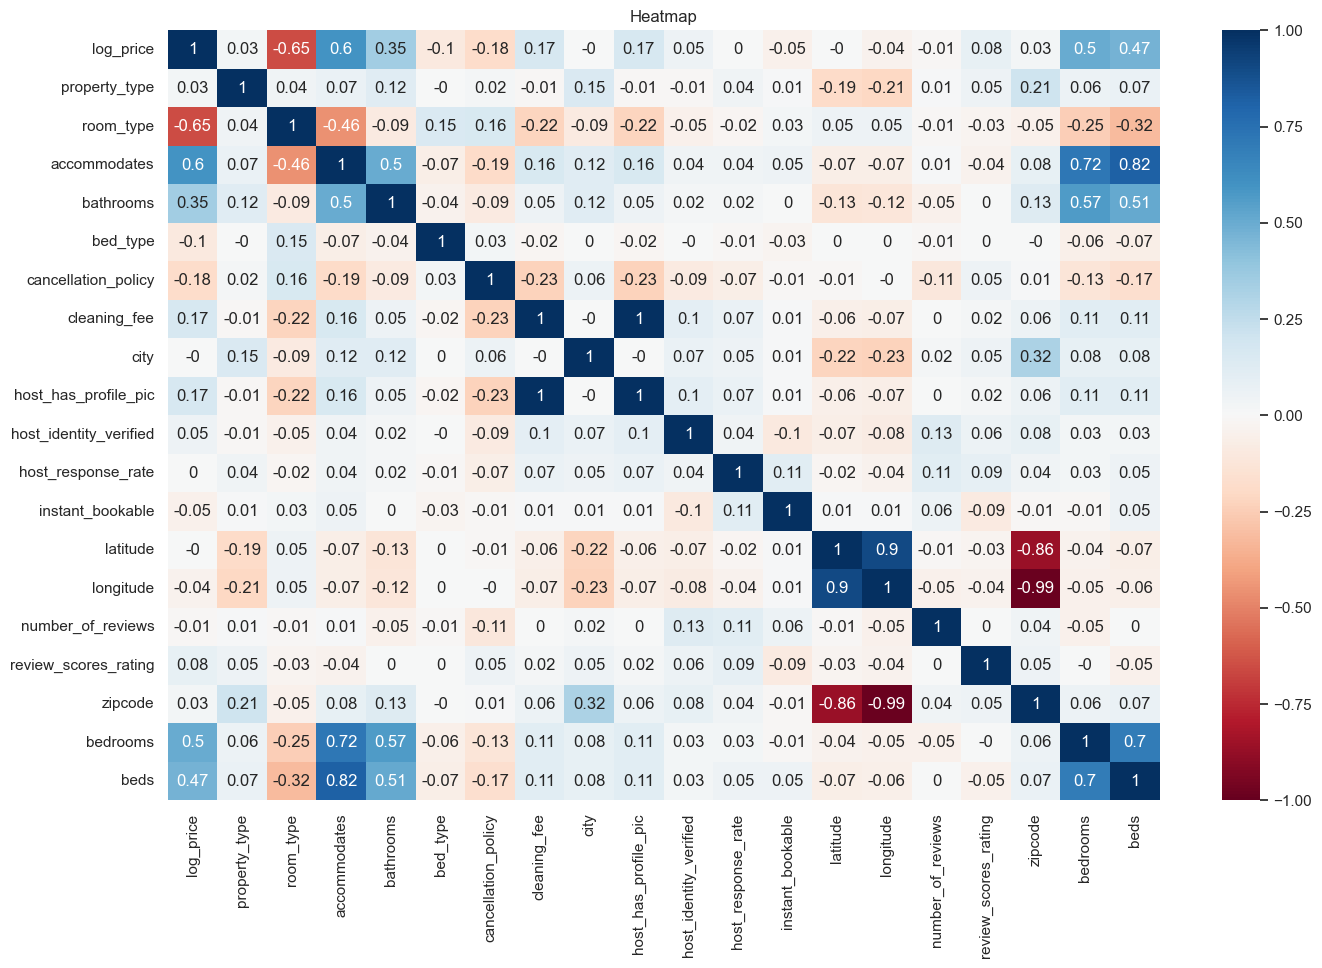

In [347]:
# Calculate the correlation matrix for the numerical variables and round the correlation values to two decimal places.
corr = df.corr().round(2)

plt.figure(figsize=(16, 10))

# Create the heatmap using a diverging color scale with the color range being [-1, 1] and center being 0
sns.heatmap(corr, cmap='RdBu', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Heatmap')

# Identify columns with high correlations (greater than a threshold)
threshold = 0.7  
high_corr_columns = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            high_corr_columns.add(col_i)
            high_corr_columns.add(col_j)

print("Highly correlated columns:", high_corr_columns)



In [348]:
# Drop a specific column which is greater than a threshold (0.7)
column_to_drop = ['longitude', 'latitude','accommodates','host_has_profile_pic']
df = df.drop(columns=column_to_drop, axis=1)

Highly correlated columns: set()


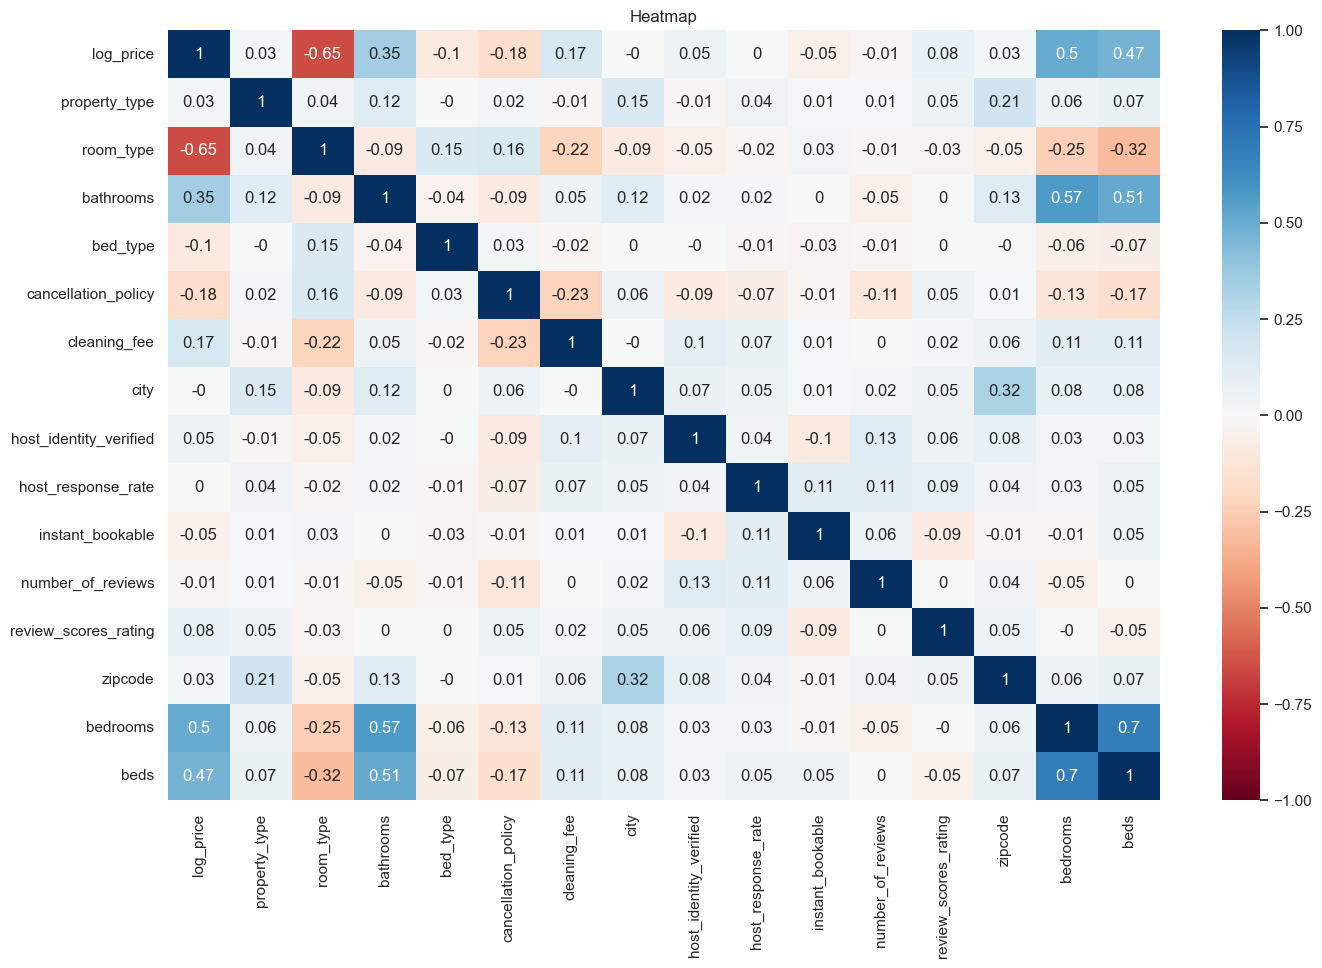

In [349]:
# Calculate the correlation matrix for the numerical variables and round the correlation values to two decimal places.
corr = df.corr().round(2)

plt.figure(figsize=(16, 10))

# Create the heatmap using a diverging color scale with the color range being [-1, 1] and center being 0
sns.heatmap(corr, cmap='RdBu', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Heatmap')

# Identify columns with high correlations (greater than a threshold)
threshold = 0.7  
high_corr_columns = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            high_corr_columns.add(col_i)
            high_corr_columns.add(col_j)

print("Highly correlated columns:", high_corr_columns)

In [350]:
df

log_price  property_type  room_type  bathrooms  bed_type  \
0       5.129899              0          0        1.0         0   
1       4.976734              0          0        1.0         0   
2       4.744932              0          0        1.0         0   
3       4.442651              0          1        1.0         0   
4       4.418841              0          0        1.0         0   
...          ...            ...        ...        ...       ...   
31871   3.912023              0          1        1.0         0   
31872   5.214936              1          0        2.0         0   
31873   4.276666              0          1        1.0         0   
31874   5.068904              0          0        1.0         0   
31875   4.234107              0          1        1.0         0   

       cancellation_policy  cleaning_fee  city  host_identity_verified  \
0                        0             1     0                       0   
1                        1             1     0                       1   
2                        1             1     5                       1   
3                        0             1     1                       1   
4                        1             1     2                       0   
...                    ...           ...   ...                     ...   
31871                    2             0     0                       1   
31872                    0             1     2                       0   
31873                    2             1     2                       1   
31874                    0             1     0                       1   
31875                    0             1     0                       1   

       host_response_rate  instant_bookable  number_of_reviews  \
0                     100                 1                  6   
1                     100                 1                 10   
2                     100                 1                  4   
3                     100                 1                  3   
4                     100                 1                 15   
...                   ...               ...                ...   
31871                 100                 0                 28   
31872                 100                 0                 16   
31873                 100                 1                  2   
31874                  93                 1                150   
31875                 100                 0                 19   

       review_scores_rating  zipcode  bedrooms  beds  
0                      93.0  10019.0       3.0   3.0  
1                      92.0  10027.0       1.0   3.0  
2                      40.0  20009.0       0.0   1.0  
3                     100.0  94131.0       1.0   1.0  
4                      97.0  90292.0       1.0   1.0  
...                     ...      ...       ...   ...  
31871                  98.0  10031.0       1.0   1.0  
31872                  96.0  90016.0       3.0   3.0  
31873                  90.0  90036.0       1.0   1.0  
31874                  82.0  10003.0       2.0   3.0  
31875                  96.0  11213.0       2.0   1.0  

[31876 rows x 16 columns]

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               31876 non-null  float64
 1   property_type           31876 non-null  int64  
 2   room_type               31876 non-null  int64  
 3   bathrooms               31876 non-null  float64
 4   bed_type                31876 non-null  int64  
 5   cancellation_policy     31876 non-null  int64  
 6   cleaning_fee            31876 non-null  int64  
 7   city                    31876 non-null  int64  
 8   host_identity_verified  31876 non-null  int64  
 9   host_response_rate      31876 non-null  int64  
 10  instant_bookable        31876 non-null  int64  
 11  number_of_reviews       31876 non-null  int64  
 12  review_scores_rating    31876 non-null  float64
 13  zipcode                 31864 non-null  float64
 14  bedrooms                31876 non-null

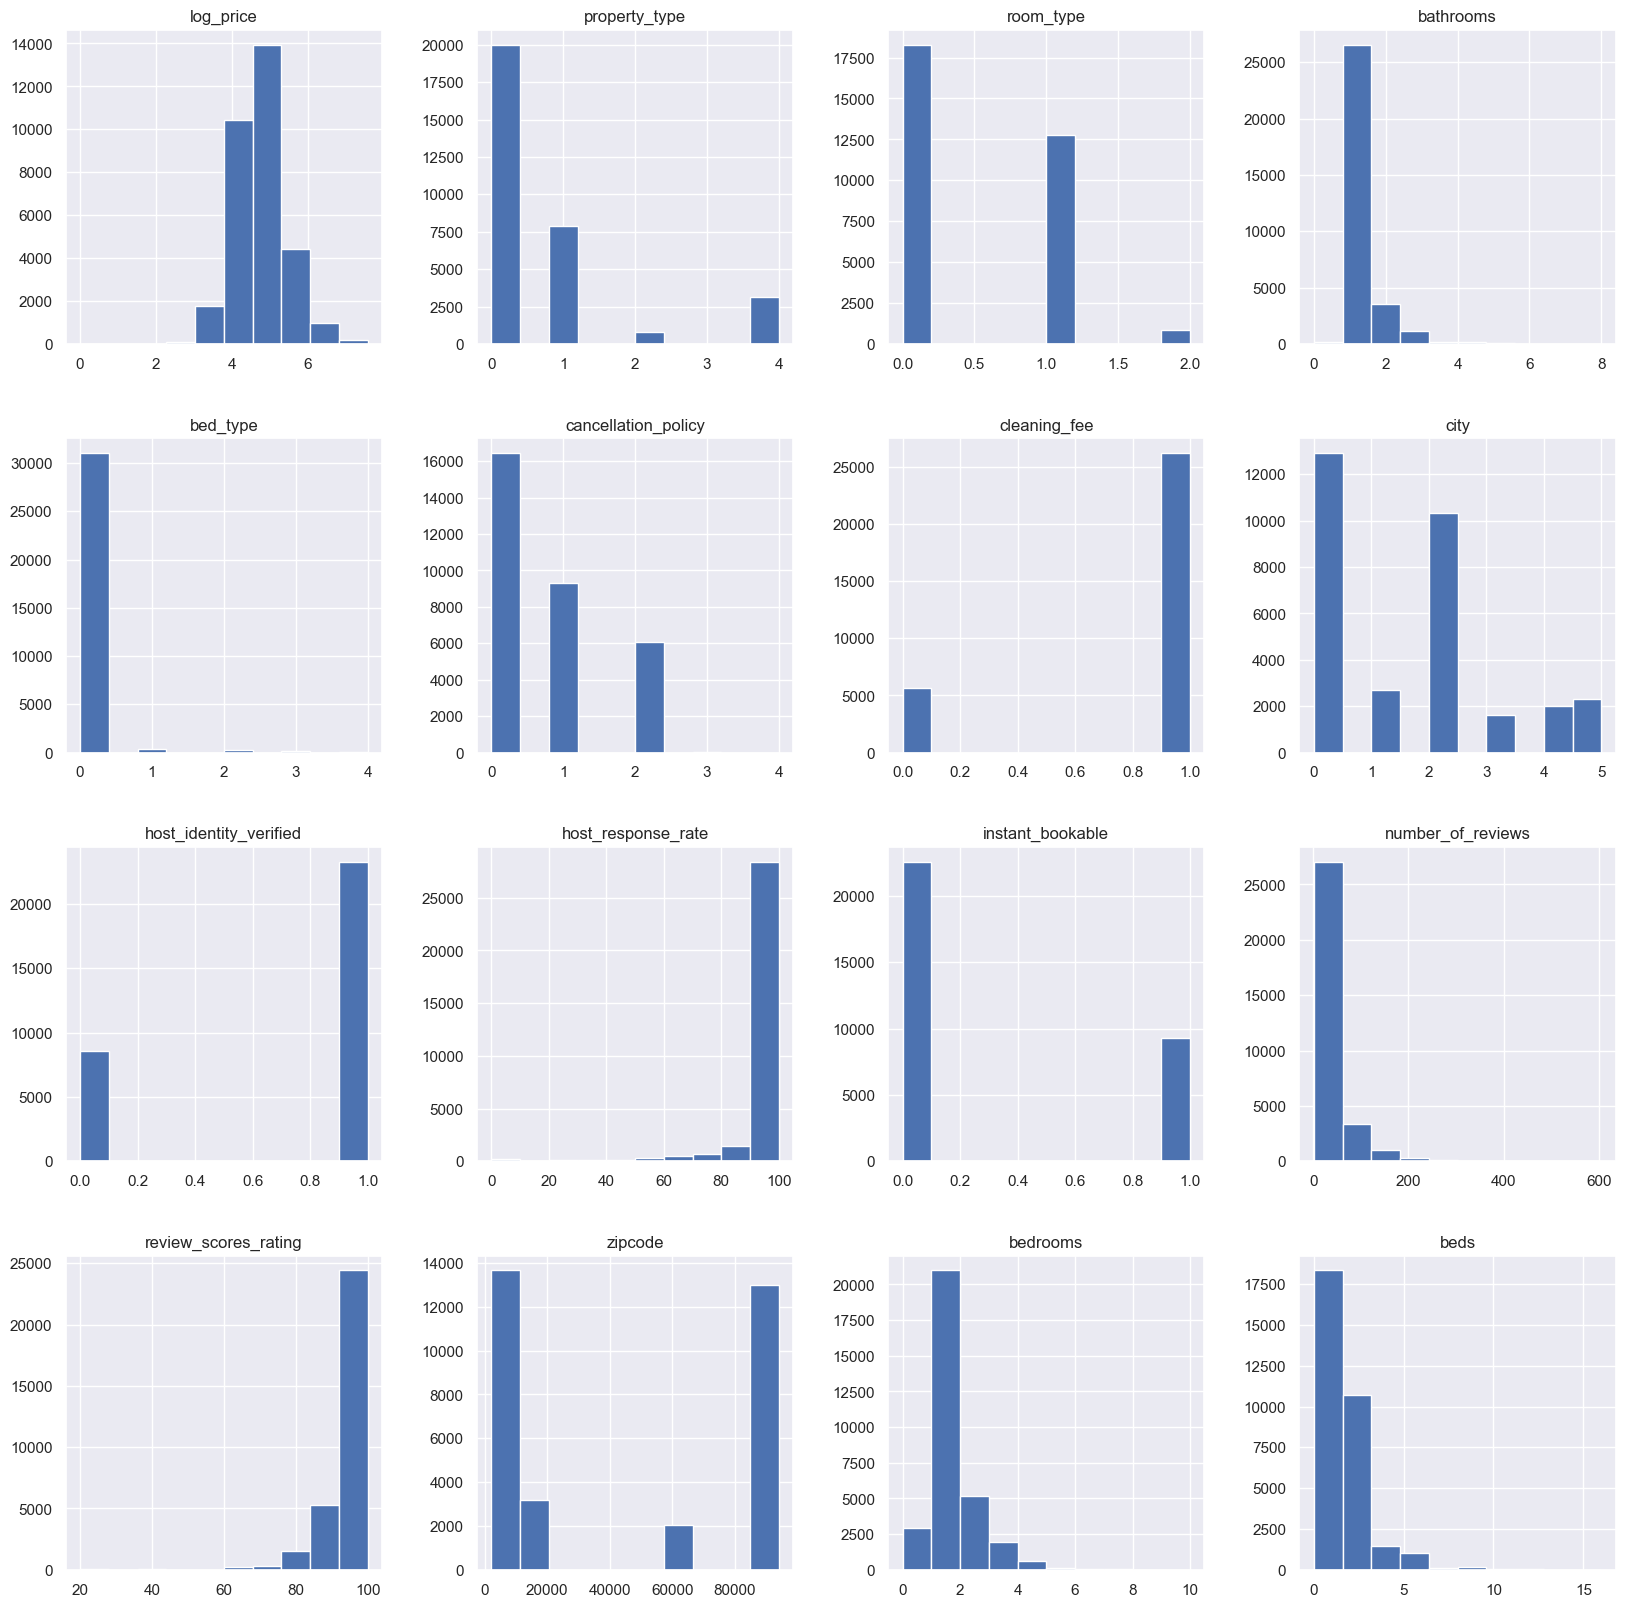

In [352]:
# draw histograms for each variables
his = df.hist(figsize = (20,20))
plt.show()

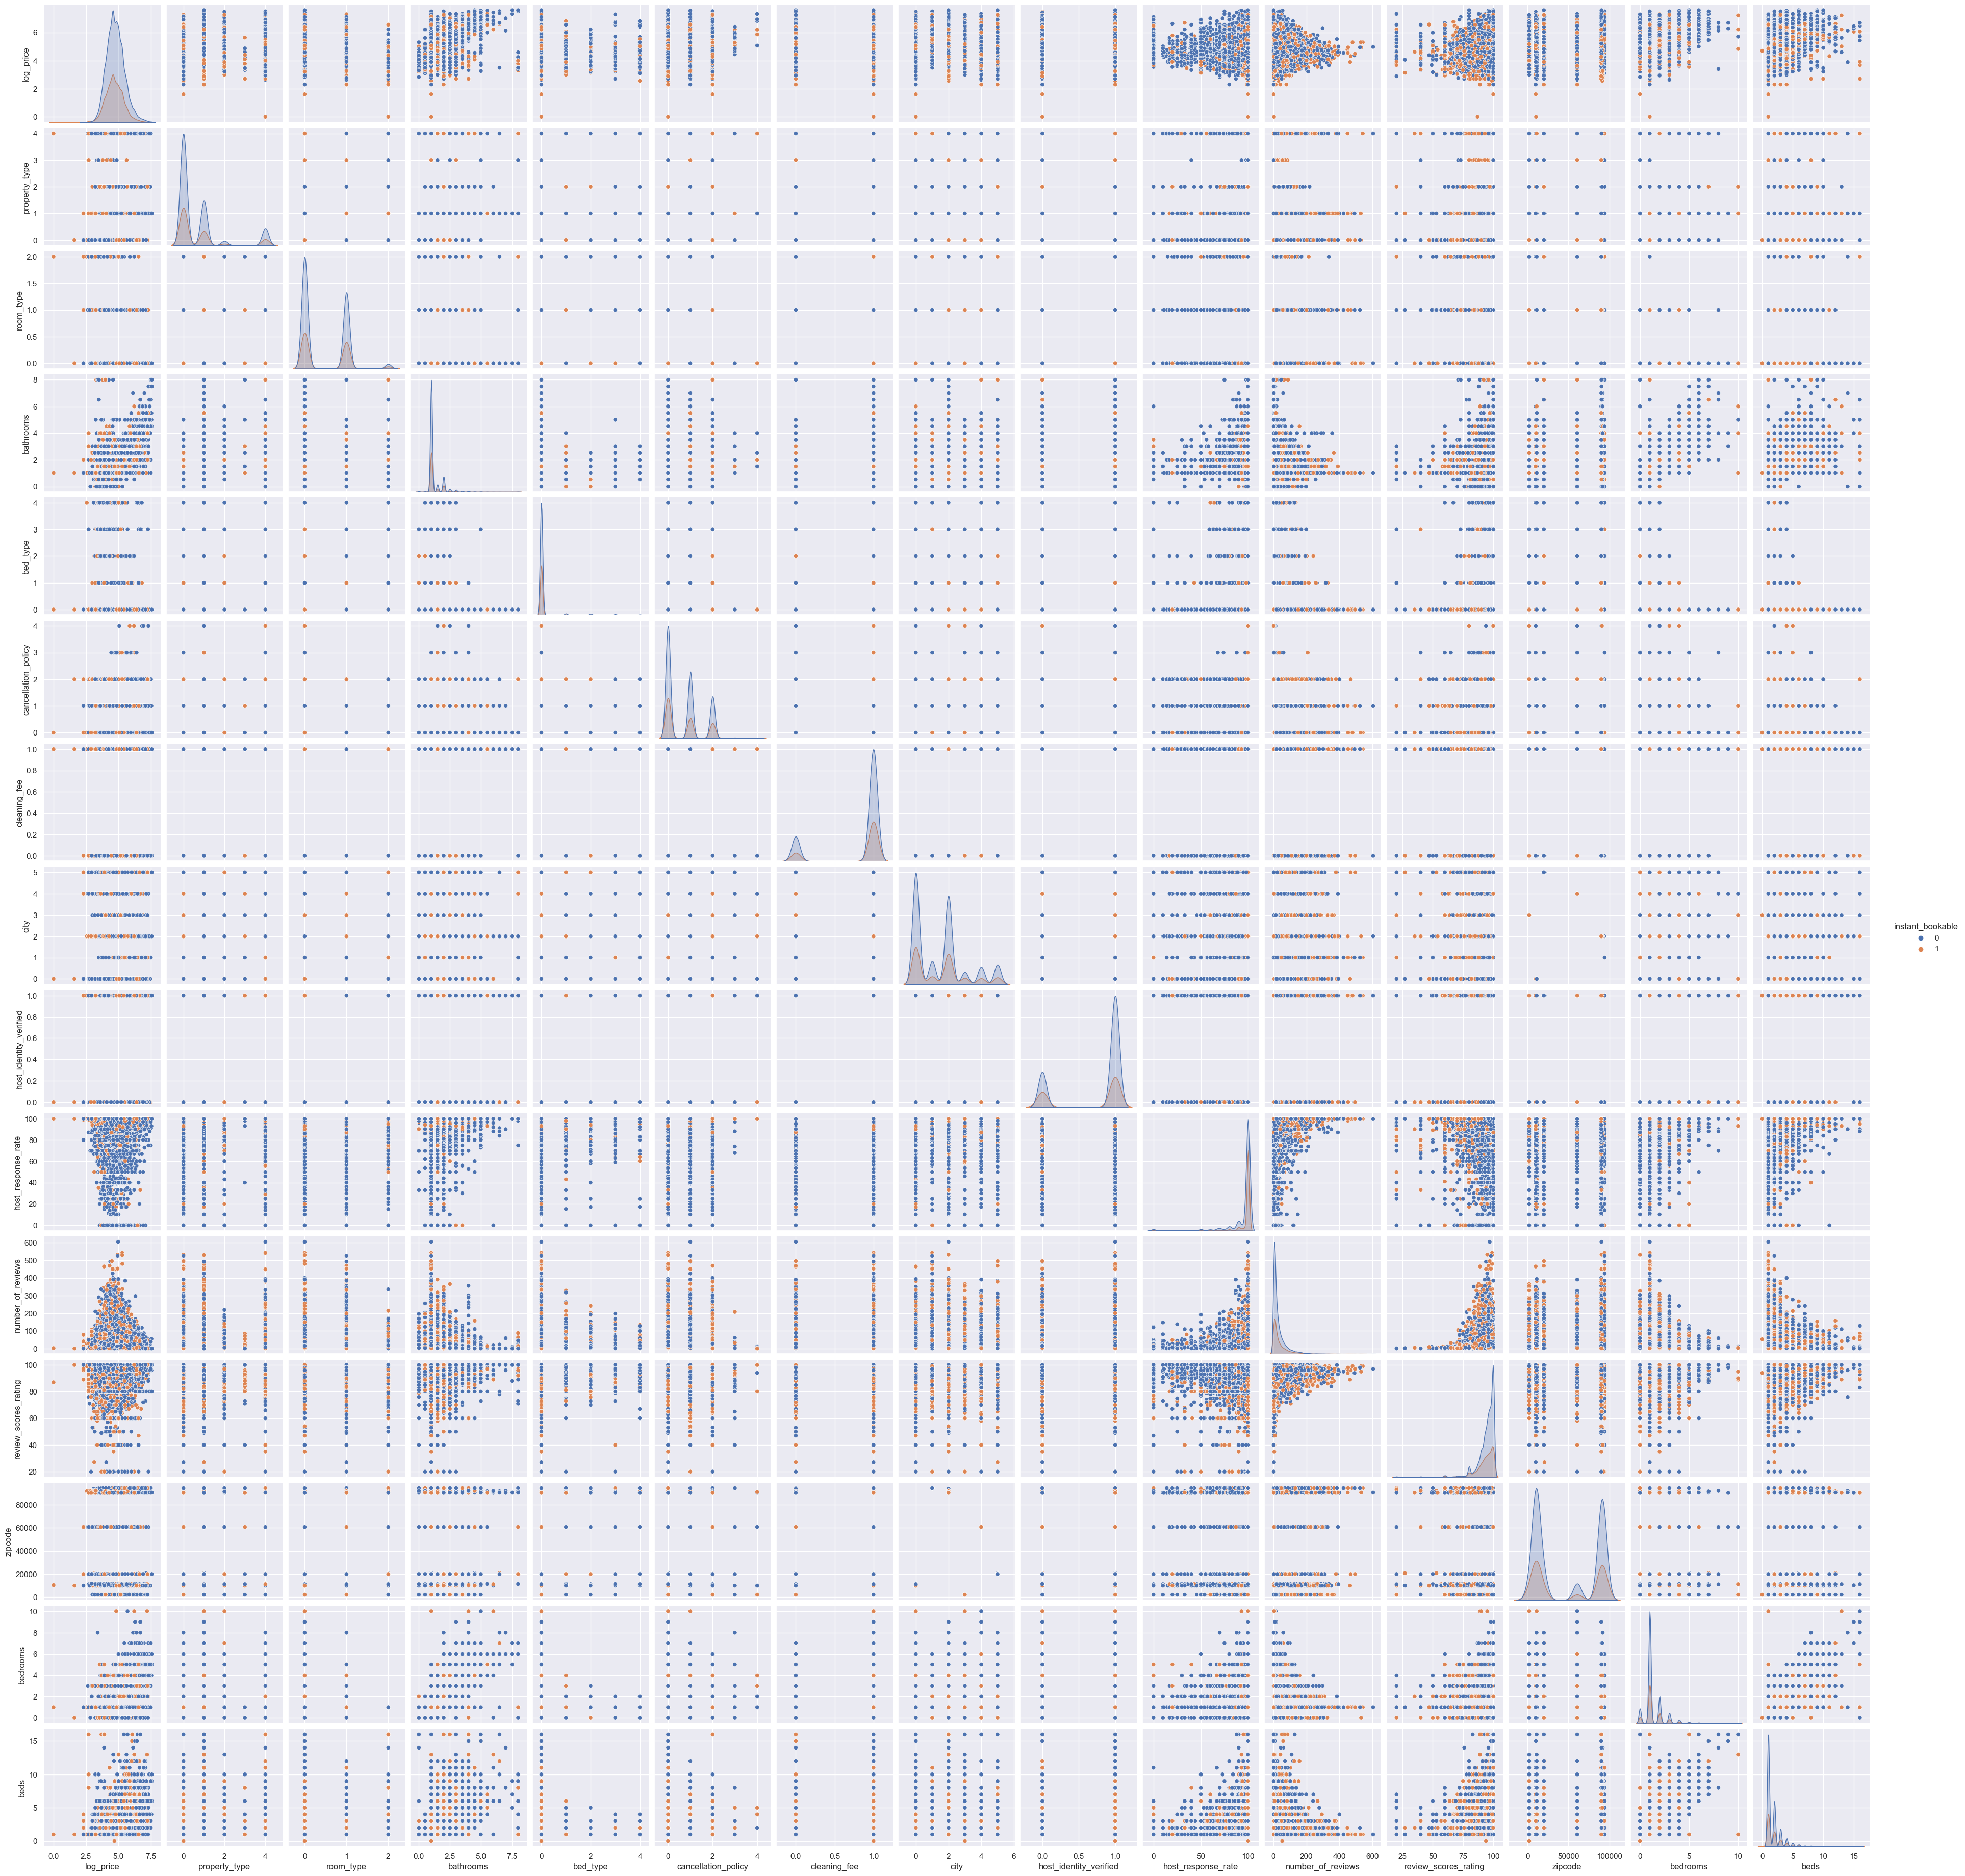

In [365]:
# Create a pairplot with colored points based on the 'instant_bookable' column
sns.set(style="darkgrid")
sns.pairplot(df, hue="instant_bookable", diag_kind="kde")
plt.show()

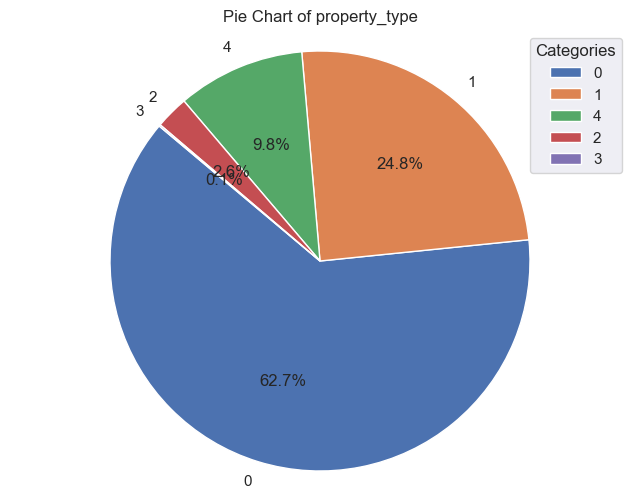

In [354]:
column_to_plot = 'property_type'
value_counts = df[column_to_plot].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_to_plot}')
plt.axis('equal') 
# Add a legend
plt.legend(title='Categories', loc='best') 
plt.show()


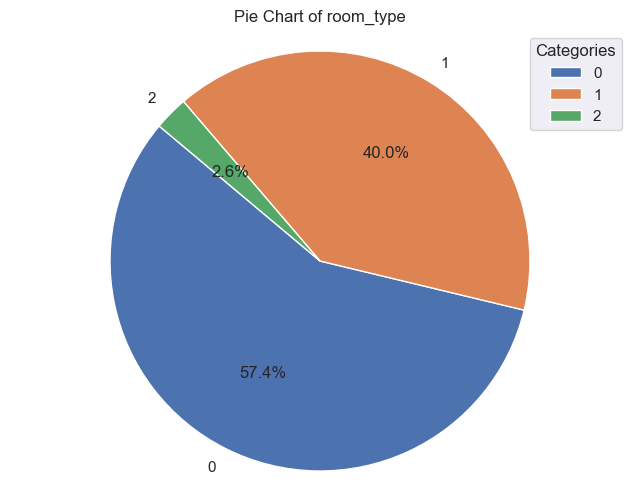

In [355]:
column_to_plot = 'room_type'
value_counts = df[column_to_plot].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_to_plot}')
plt.axis('equal')  
# Add a legend
plt.legend(title='Categories', loc='best')
plt.show()

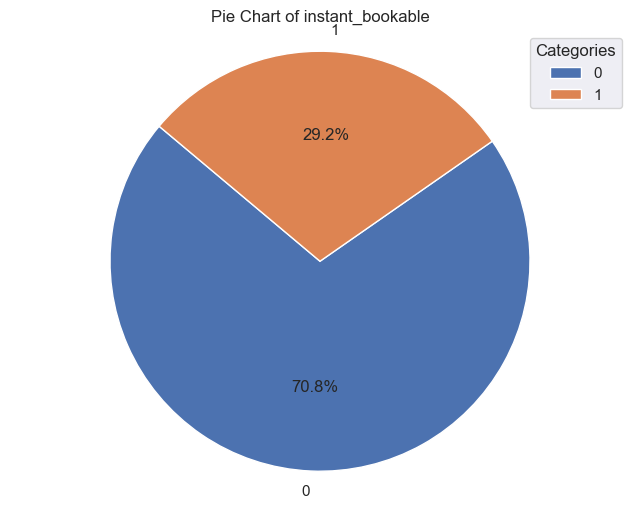

In [356]:
column_to_plot = 'instant_bookable'
value_counts = df[column_to_plot].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_to_plot}')
plt.axis('equal')  
# Add a legend
plt.legend(title='Categories', loc='best')
plt.show()

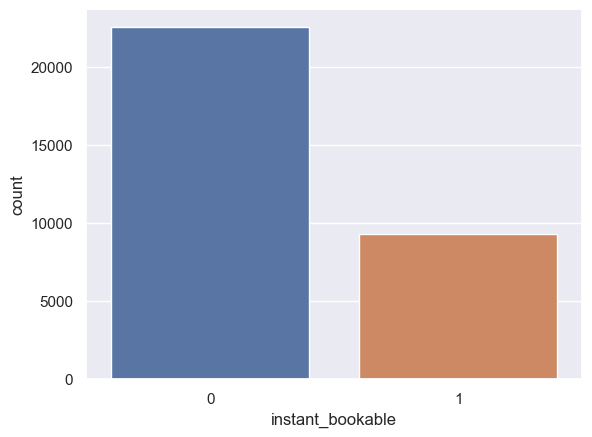

In [357]:
sns.countplot(x = df['instant_bookable'])
plt.show()

### Dataset Splitting at an 8:2 ratio

In [362]:
# Define features (attributes) and labels
X = df.drop('instant_bookable', axis=1)  # Features
y = df['instant_bookable']  # Labels

# labels = np.unique(y)
# print("Unique labels:", labels)

# Split the data into training and testing sets with 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25500, 15)
X_test shape: (6376, 15)
y_train shape: (25500,)
y_test shape: (6376,)


### Building Models

### k-NN Algorithm

### Random Forest

### XGBoost

### LightGBM(LGBM)